In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [2]:
data = pd.read_csv('Data/SMSSpamCollection',sep='\t',header=None,)
data.columns = ['Label', 'Message']
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
ham_length = data['Label'].value_counts()[0]
spam_lenght = data['Label'].value_counts()[1]

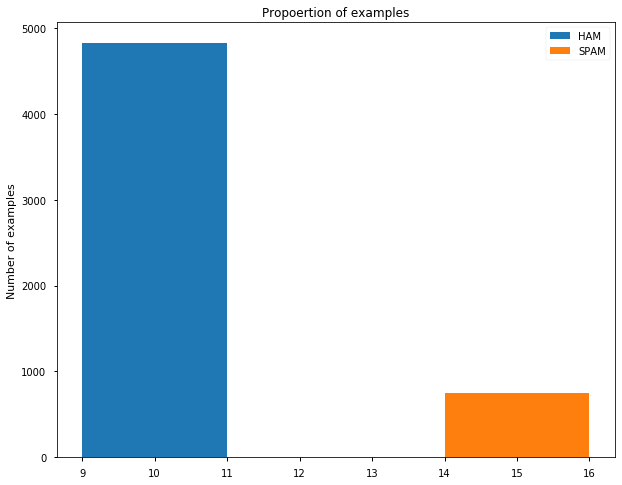

In [11]:
plt.figure(figsize=(10,8))
plt.bar(10,ham_length,2,label="HAM")
plt.bar(15,spam_lenght,2,label="SPAM")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

In [12]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [13]:
data['Message'] = data['Message'].apply(remove_punctuation)

In [14]:
sw = stopwords.words('english')
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [15]:
data['Message'] = data['Message'].apply(stopwords)

In [16]:
stemmer = SnowballStemmer("english")

def stemming(text):    
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [17]:
data['Message'] = data['Message'].apply(stemming)

In [19]:
tfid_vectorizer = TfidfVectorizer("english")
tfid_vectorizer.fit(data['Message'])
dictionary = tfid_vectorizer.vocabulary_.items()  

In [21]:
tfid_matrix = tfid_vectorizer.transform(data['Message'])
array = tfid_matrix.todense()
df = pd.DataFrame(array)

In [22]:
df['Label'] = data['Label']

In [23]:
features = df.columns.tolist()
features.remove('Label')

In [24]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import GridSearchCV
alpha_list1 = np.linspace(0.006, 0.1, 20)
alpha_list1 = np.around(alpha_list1, decimals=4)
alpha_list1

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [25]:
parameter_grid = [{"alpha":alpha_list1}]
classifier1 = MultinomialNB()
gridsearch1 = GridSearchCV(classifier1,parameter_grid, scoring = 'neg_log_loss', cv = 4)
gridsearch1.fit(df[features], df['Label'])

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [26]:
results1 = pd.DataFrame()
results1['alpha'] = gridsearch1.cv_results_['param_alpha'].data
results1['neglogloss'] = gridsearch1.cv_results_['mean_test_score'].data

Best parameter:  {'alpha': 0.0159}
Best score:  -0.06924105716604838


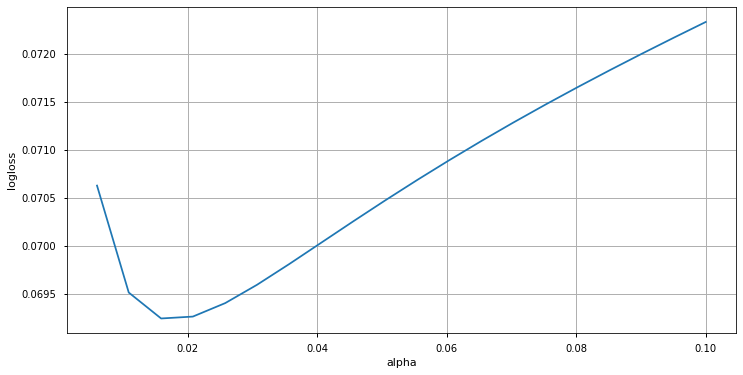

In [29]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results1['alpha'], -results1['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()
print("Best parameter: ",gridsearch1.best_params_)
print("Best score: ",gridsearch1.best_score_)